## EDA

# 기본 세팅

In [1]:
from google.colab import drive
drive.mount('/content/data') # 드라이브 연결

Mounted at /content/data


In [ ]:
# 데이터 분석에 사용할 라이브러리
import pandas as pd
import numpy as np
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [ ]:
# 코렙 한글깨짐 방지
!apt -qq -y install fonts-nanum > /dev/null

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=fontpath).get_name() 
# fm._rebuild()  


# %config InlineBackend.figure_format = 'retina'

# plt.rc('font', family=font_name)  
# plt.rcParams['axes.unicode_minus'] = False 

## 데이터 로드

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.columns

In [ ]:
DATA_PATH = "/content/data/MyDrive/machine learning/data/Titanic.csv"
df = pd.read_csv(DATA_PATH)
df.head(2)

# 수치형 데이터 분석

In [ ]:
df_number = df.select_dtypes(include=np.number)
# df_number.info()
df_number

## 통계적 분석

In [ ]:
df_number['age'].sum() # 총합
df_number['age'].mean() # 평균
df_number['age'].median() # 중앙값
df_number['age'].var() # 분산
df_number['age'].std() # 표준편차
df_number['age'].min() # 최소값
df_number['age'].max() # 최대값
df_number['age'].quantile([0.25, 0.5, 0.75]) # 분위수 계산

### 첨도 분석

In [ ]:
df_number['fare'].kurt()

In [ ]:
df_number['fare'].plot.hist(bins=50)

In [ ]:
df_number['fare'].diff().hist(bins=50) # diff(): 한 객체 내에서 열과 열 / 행과 행의 차이를 출력하는 메서드 

### 왜도 분석

In [ ]:
df_number['fare'].mean(), df_number['fare'].median(), df_number['fare'].mode()

(32.204207968574636, 14.4542, 0    8.05
 Name: fare, dtype: float64)

In [ ]:
df_number['fare'].skew()

4.787316519674893

<Axes: ylabel='Frequency'>

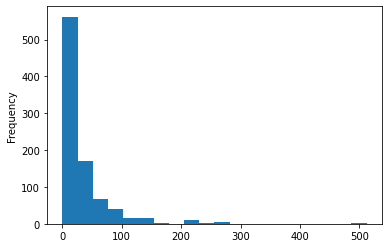

In [ ]:
df_number['fare'].plot.hist(bins=20)

## 이상치 분석

<Axes: ylabel='age'>

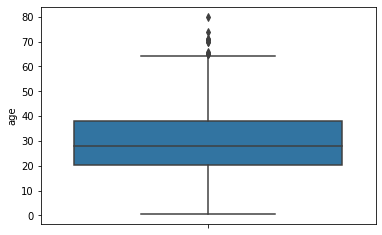

In [ ]:
sns.boxplot(y=df_number['age'], data=df)

<Axes: xlabel='survived', ylabel='age'>

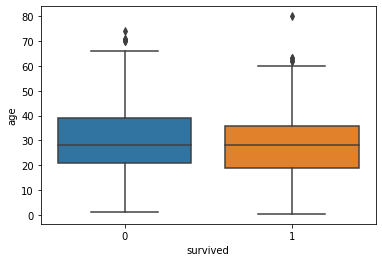

In [ ]:
sns.boxplot(x=df['survived'], y=df['age'], data=df) # survived 에 따른 age 

## 상관관계 분석

In [ ]:
df_number.corr()

In [ ]:
df_number.plot(kind='scatter', x='pclass', y='fare')

In [ ]:
df_number.plot(kind='scatter', x='age', y='fare')

In [ ]:
sns.heatmap(df_number.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='Reds')

# 범주형 데이터 분석

In [ ]:
df_object = df.select_dtypes(exclude=np.number)

In [ ]:
df_object = df_object.join(df_number['survived']) # survived 추가
df_object['survived'] = df_object['survived'].astype('object') # 데이터 타입 변경
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      891 non-null    object
 1   sex       891 non-null    object
 2   ticket    891 non-null    object
 3   cabin     204 non-null    object
 4   embarked  889 non-null    object
 5   survived  891 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
df_object.head(2)

,name,sex,ticket,cabin,embarked,survived
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1


## 통계적 분석

In [ ]:
df_object.describe()

df_object['embarked'].nunique() # 고유값 개수
df_object['embarked'].unique() # 고유값 뭐뭐 있는지
df_object['embarked'].mode() # 최빈값
df_object['embarked'].value_counts() # 범주별 개수
df_object["embarked"].value_counts(normalize=True) # 범주별 비율

## 교차 분석

In [ ]:
pd.crosstab(df_object["sex"],df_object["survived"],margins = True)

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
pd.crosstab(df_object["sex"],df_object["survived"], normalize= "index") # index 기준 데이터 비율 (소계 미포함)

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [ ]:
pd.crosstab(df_object["sex"],df_object["survived"], normalize= "all") # 전체 기준 데이터 비율(소계 미포함)

survived,0,1
sex,,
female,0.090909,0.261504
male,0.525253,0.122334


In [ ]:
pd.crosstab(df_object["sex"],df_object["survived"], normalize= "columns")# columns 기준 데이터 비율(소계 미포함)

survived,0,1
sex,,
female,0.147541,0.681287
male,0.852459,0.318713


In [ ]:
pd.crosstab(df_object["sex"],df_object["survived"],margins=True, normalize= "index") # index 기준 데이터 비율 (sex를 기준으로 했을떄 female , male 각각 합쳐서 1이 나옴)

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [ ]:
pd.crosstab(df_object["sex"],df_object["survived"], margins=True,normalize= "all") # 전체 기준 데이터 비율(모든 기준을 다 충족)

survived,0,1,All
sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


In [ ]:
pd.crosstab(df_object["sex"],df_object["survived"],margins=True, normalize= "columns") # columns 기준 데이터 비율(survived를 기준으로 했을때 0 , 1 각각 합쳐서 1이 나옴)

survived,0,1,All
sex,,,
female,0.147541,0.681287,0.352413
male,0.852459,0.318713,0.647587


## pivot_table 분석

In [ ]:
df.info()

In [ ]:
df_pivot = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = 'pclass',    # 행 위치에 들어갈 열
                     columns = 'sex',    # 열 위치에 들어갈 열
                     values = 'survived',     # 데이터로 사용할 열
                     aggfunc = ['mean', 'sum'])   # 데이터 집계함수

df_pivot                

mean              sum     
sex       female      male female male
pclass                                
1       0.968085  0.368852     91   45
2       0.921053  0.157407     70   17
3       0.500000  0.135447     72   47

In [ ]:
df_pivot = pd.pivot_table(df,
                     index = ['pclass','sex'],
                     columns = 'survived',
                     values = ['age','fare'],
                     aggfunc = ['mean','max'])

df_pivot

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
pclass sex                                                                
1      female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
2      female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
3      female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
pclass sex                       
1      female  151.55  512.3292  
       male    263.00  512.3292  
2      female   26.00   65.0000  
       male     73.50   39.0000  
3      female   69.55   31.3875  
       male     69.55   56.4958